## 引入函式庫

In [68]:
import keras
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense,Activation

## 準備資料

In [113]:
X = np.random.rand(100,3)
print(X)

[[0.9125283  0.43128726 0.19645851]
 [0.41449017 0.53266034 0.00606159]
 [0.29088122 0.32387086 0.97117621]
 [0.69226    0.01841926 0.09116947]
 [0.59605212 0.77604877 0.70946161]
 [0.02272676 0.76927223 0.35026816]
 [0.65619447 0.35673275 0.79666304]
 [0.07478325 0.87394581 0.91402908]
 [0.1634202  0.43447103 0.48095017]
 [0.71777924 0.11792005 0.40904203]
 [0.59202784 0.50708118 0.7573172 ]
 [0.16390422 0.47768508 0.8924969 ]
 [0.50093516 0.56665612 0.9875392 ]
 [0.98721574 0.16094673 0.59176509]
 [0.93634788 0.81806579 0.70819287]
 [0.51010965 0.96817587 0.653228  ]
 [0.89885119 0.81905458 0.57061044]
 [0.07939537 0.88306512 0.55582791]
 [0.09175567 0.96584082 0.25468575]
 [0.41910822 0.5462093  0.53595666]
 [0.40085816 0.10899254 0.00840248]
 [0.15454114 0.06516376 0.47935107]
 [0.56062152 0.85298561 0.25373077]
 [0.41374101 0.58176563 0.61195842]
 [0.38062267 0.5759498  0.00268958]
 [0.1325626  0.60230364 0.01037769]
 [0.46405175 0.18086056 0.17965765]
 [0.9886429  0.94654125 0.80

In [114]:
W = np.array([0.4,0.5,0.1])

In [115]:
Y = np.dot(X,W)
def f(x):
    if x>0.5:
        return 1
    else:
        return 0
vf = np.vectorize(f)
Y = vf(Y)
print(Y)
print(Y.shape)

[1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1]
(100,)


## 準備資料
我們擁有一個$X$(100,3)與$Y$(100,)，現在要準備建立一個神經網路來進行模型建置．首先是要讓抽出 train data set 與 test data set，比例為 7:3 然後要將$Y$的資料用 one-hot vector作轉換，因為這裡的資料只有有過1與沒過0．所以透過 keras.to_categorical 就可以直接處理成功．

### 資料參數

In [116]:
size = 100
train_size = 70

### 抽出測試資料集

In [117]:
mask_index = np.random.choice(size,train_size,replace=False)
mask = np.ones(size,dtype=bool)
mask[mask_index] = False
mask = ~mask

In [118]:
x_train = X[mask]
y_train = keras.utils.to_categorical(Y[mask], num_classes=2)

In [119]:
x_test = X[~mask]
y_test = keras.utils.to_categorical(Y[~mask], num_classes=2)

In [120]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70, 3)
(70, 2)
(30, 3)
(30, 2)


## 設計模型

In [121]:
batch_size = 10   ## 每次計算都用10個樣本
epochs = 100  ## 1 epoch 等於 70訓練樣本 / 10 每次計算的樣本數 = 7 次計算 = 1 epoch


In [124]:
model = Sequential()
model.add(Dense(2, input_shape=(3,)))
#model.add(Activation('sigmoid'))
#model.add(Dense(2, use_bias=True))
model.add(Activation('softmax')) 
model.summary()  #列出模型概況
# 參數學習
sgd = SGD(lr=0.01)
# 誤差計算
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 2)                 8         
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


## 訓練

In [125]:
history = model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test, y_test))

Train on 70 samples, validate on 30 samples
Epoch 1/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6818 - acc: 0.5286 - val_loss: 0.7138 - val_acc: 0.5667
Epoch 2/100
70/70 [==============================] - 0s 178us/step - loss: 0.6799 - acc: 0.5286 - val_loss: 0.7121 - val_acc: 0.5667
Epoch 3/100
70/70 [==============================] - 0s 206us/step - loss: 0.6790 - acc: 0.5286 - val_loss: 0.7106 - val_acc: 0.5667
Epoch 4/100
70/70 [==============================] - 0s 227us/step - loss: 0.6776 - acc: 0.5286 - val_loss: 0.7090 - val_acc: 0.5667
Epoch 5/100
70/70 [==============================] - 0s 212us/step - loss: 0.6761 - acc: 0.5857 - val_loss: 0.7075 - val_acc: 0.5667
Epoch 6/100
70/70 [==============================] - 0s 252us/step - loss: 0.6750 - acc: 0.5571 - val_loss: 0.7060 - val_acc: 0.5667
Epoch 7/100
70/70 [==============================] - 0s 274us/step - loss: 0.6736 - acc: 0.6000 - val_loss: 0.7045 - val_acc: 0.5667
Epoch 8/100
70/70 [========

Epoch 62/100
70/70 [==============================] - 0s 210us/step - loss: 0.6119 - acc: 0.6714 - val_loss: 0.6478 - val_acc: 0.6333
Epoch 63/100
70/70 [==============================] - 0s 174us/step - loss: 0.6109 - acc: 0.6714 - val_loss: 0.6470 - val_acc: 0.6333
Epoch 64/100
70/70 [==============================] - 0s 211us/step - loss: 0.6100 - acc: 0.6714 - val_loss: 0.6462 - val_acc: 0.6333
Epoch 65/100
70/70 [==============================] - 0s 222us/step - loss: 0.6093 - acc: 0.6714 - val_loss: 0.6453 - val_acc: 0.6333
Epoch 66/100
70/70 [==============================] - 0s 206us/step - loss: 0.6083 - acc: 0.6714 - val_loss: 0.6445 - val_acc: 0.6333
Epoch 67/100
70/70 [==============================] - 0s 197us/step - loss: 0.6073 - acc: 0.6714 - val_loss: 0.6437 - val_acc: 0.6333
Epoch 68/100
70/70 [==============================] - 0s 193us/step - loss: 0.6066 - acc: 0.6714 - val_loss: 0.6428 - val_acc: 0.6333
Epoch 69/100
70/70 [==============================] - 0s 198us

## 模型預測

In [135]:
predict_x = np.random.rand(1,3)
print(predict_x)

[[0.51320009 0.81112485 0.3292509 ]]


In [136]:
model.predict(predict_x)

array([[0.41014126, 0.5898588 ]], dtype=float32)

In [137]:
model.predict_classes(predict_x)

array([1])

In [138]:
np.dot(predict_x,W)

array([0.64376755])

## 模型準確度圖

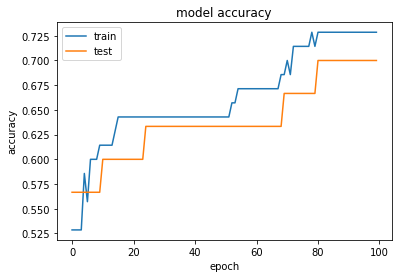

In [139]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##  模型誤差圖

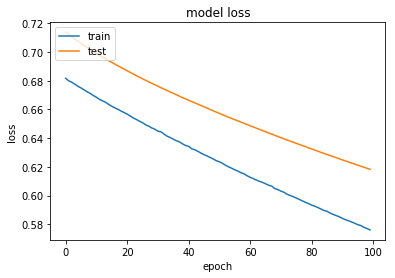

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
model.get_weights()[0].shape

(3, 2)

In [109]:
import pandas as pd
d = pd.read_csv('data.tsv',delimiter='\t')
x_train = d[d.columns[0:3]].as_matrix()
y_train = keras.utils.to_categorical(d[d.columns[3]].as_matrix(),num_classes=2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [95]:
X.shape

(30, 3)

In [96]:
Y.shape

(30,)

In [110]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_dim=3))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=3)

Epoch 1/50
30/30 [==============================] - 0s 6ms/step - loss: 1.1702 - acc: 0.0667
Epoch 2/50
30/30 [==============================] - 0s 862us/step - loss: 1.1072 - acc: 0.0667
Epoch 3/50
30/30 [==============================] - 0s 682us/step - loss: 1.0524 - acc: 0.0667
Epoch 4/50
30/30 [==============================] - 0s 660us/step - loss: 1.0033 - acc: 0.0667
Epoch 5/50
30/30 [==============================] - 0s 460us/step - loss: 0.9570 - acc: 0.0667
Epoch 6/50
30/30 [==============================] - 0s 458us/step - loss: 0.9164 - acc: 0.0667
Epoch 7/50
30/30 [==============================] - 0s 693us/step - loss: 0.8817 - acc: 0.0667
Epoch 8/50
30/30 [==============================] - 0s 596us/step - loss: 0.8482 - acc: 0.0667
Epoch 9/50
30/30 [==============================] - 0s 546us/step - loss: 0.8192 - acc: 0.0667
Epoch 10/50
30/30 [==============================] - 0s 481us/step - loss: 0.7929 - acc: 0.0667
Epoch 11/50
30/30 [==============================] 

In [112]:
classes = model.predict(np.array([10,5,3]).reshape(1,3), batch_size=1)
classes

array([[0.4040768, 0.5959232]], dtype=float32)